## Exploratory Data Analysis
This kernel summarizes the main characteristics of the variables in our data.

## Data
The BIO data for this project is a “Yes” and “No” response of online users to the following question:


`Q: Do you know the brand SmartAd?`

      Yes
      No

The data has the following columns:
  * **auction_id**: the unique id of the online user who has been presented the BIO. 
  * **experiment**: which group the user belongs to - control or exposed.
  * **date**: the date in YYYY-MM-DD format
  * **hour**: the hour of the day in HH format.
  * **device_make**: the name of the type of device the user has e.g. Samsung
  * **platform_os**: the id of the OS the user has. 
  * **browser**: the name of the browser the user uses to see the BIO questionnaire.
  * **yes**: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
  * **no**: 1 if the user chooses the “No” radio button for the BIO questionnaire.

## Table of Contents
1. [Libraries](#Libraries)
2. [Dataset](#Data-Reading)
3. [Variables and DataTypes](#Variables-and-their-data-types.)
4. [Univariate Analysis](#Univariate-analysis)

    4.1 [Non-Graphical](#Non-Graphical)

    4.2 [Graphical](#Graphical-Univariate-Analysis)

5. [Multivariate Analysis](#Multivariate-analysis)

    5.1 [Correlation](#Correlation)

    5.2 [Bivariate Analysis](#Pair-Plots-(Bivariate-Analysis))

## 1. Libraries

In [4]:
# linear algebra and data processing
import numpy as np
import pandas as pd

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# math and statistics libraries
from scipy import stats
from scipy.stats import skew, norm
import math

# others
import datetime

# column transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# google authentication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# ignore  warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

## 2. Data Reading

In [5]:
# function to fetch data
def fetch_data(id, file_name):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(file_name)

  data=pd.read_csv(file_name)
  return data

In [8]:
# fetch the data
data = fetch_data('1YSn01vvlHKQaAIBtwIXRNd-oTaTuDN09', 'ABAdRecall.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [9]:
# the shape of our data
print('the size of the dataset is: ', data.shape[0], 'rows and', data.shape[1], 'columns')

the size of the dataset is:  8077 rows and 9 columns


## 3. Variables and their data types.

In [10]:
# segment the features into 2 categories: categorical and numerical features
categorical = []
numerical = []
for col in data.columns:
  if data[col].dtype == object:
    categorical.append(col)
  elif data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
    numerical.append(col)

# check the data types
features = categorical + numerical 
data = data[features]
data.dtypes

auction_id     object
experiment     object
date           object
device_make    object
browser        object
hour            int64
platform_os     int64
yes             int64
no              int64
dtype: object

There are 4 numerical features. All of them are discrete in nature. 3 of them represent categorical features: **platform_os** holds numerical values for different os types, **yes** and **no** cols holds numerical values for a yes/no questionnaire. 


There are 4 categorical features. All 4 of them are nominal. **auction_id** is a unique identifier for every user, **experiment** splits the users into 2 groups (*control* and *exposed*), **device_make** and **browser** indicate different devices and browser types. 


**date** is classified as categorical but its a timestamp feature indicating the time a particular user responds to the questionnaire.

In [11]:
# change the date col to a timestamp feature
data.date = pd.to_datetime(data["date"]) 

## 4. Univariate analysis
This involves analysis of variables independently.




#### 4.1 Non-Graphical
Univariate analysis without the use of graphs.

In [12]:
# measures of spread and central tendency of numerical features
data.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


**count**:  This is the total  number of instances of a particular variable. (Its a shortcut to sporting out the features with null values).

**mean**: The average value of all the entries in a particular feature.

**std**: This is the standard devistion - measure of variation of values in a particular feature.

**25%**: Lower median value of the feature.

**75%**: Median value of the feature.

**75%**: Upper median value of the feature.

**min**: Minimum value recorded of the feature.

**max**: Maximum value recorde of the feature.


The measure vary across the features since each feature is representative of its own thing. Similarities across the *yes/no* columns is because they both represent feedbacks to the *BIO* question.

In [13]:
# number of unique entries across all features
for col in data.columns:
  print(col, '-', data[col].nunique())

auction_id - 8077
experiment - 2
date - 8
device_make - 270
browser - 15
hour - 24
platform_os - 3
yes - 2
no - 2


**auction_id** has unique counts equal to the number of rows in the dataset. This is because each entry represents one user.

**Experiment** represents only 2 groups: *control* and *exposed*.

**date** has 8 unique values since data is recorded from *3 July* to *10 July*, a total of 8 days.

**device_make**, **platform_os** and **browser** have varying values. Device types are bound to be more than browser and os types (there are many device types compare to os and browser types) hence the big number under device_types. 

**hour** has 24 unique values indicating the 24 hrs in a day.

the **yes** and **no** cols have 2 unique values: 0 and 1.



In [14]:
# value counts for experiment, yes and no columns
for col  in ['yes', 'no', 'experiment']:
  print(col, ': \n',data[col].value_counts())

yes : 
 0    7505
1     572
Name: yes, dtype: int64
no : 
 0    7406
1     671
Name: no, dtype: int64
experiment : 
 control    4071
exposed    4006
Name: experiment, dtype: int64


The 1s in yes and no indicates guys that responded to the questionnaire (15% of the total population).

The 1s in yes indicates guys that recall the SmartAd ad. The number is relatively low. The 1s in no indicate guys that don't recall the ad. The number is higher than the guys that recall.

The number of users in the control and exposed groups appear to be 'balanced'.



#### 4.2 Graphical Univariate Anlysis

##### 4.2.1 Distributions
A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment. 

[Text(0.5, 1.0, 'hour distribution')]

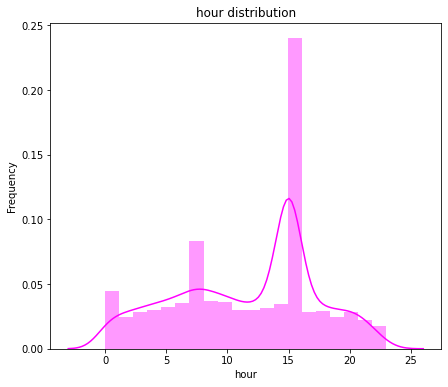

In [15]:
# hour distribution
f, ax = plt.subplots(figsize=(7, 6))
sns.distplot(data['hour'], bins = 20, color = 'Magenta')
ax.set(ylabel="Frequency")
ax.set(xlabel="hour")
ax.set(title="hour distribution")

The variable is somewhat uniformly distributed but the 1st, 8th and 15th hours have shooting frequencies.

[Text(0.5, 1.0, 'yes distribution')]

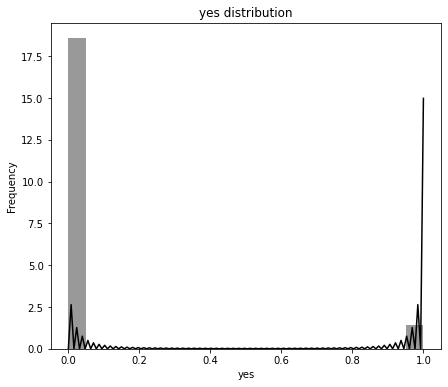

In [16]:
# yes distribution
f, ax = plt.subplots(figsize=(7, 6))
sns.distplot(data['yes'], bins = 20, color = 'black')
ax.set(ylabel="Frequency")
ax.set(xlabel="yes")
ax.set(title="yes distribution")

The variable only has 2 values: 0 and 1.(Discrete Probability distribution)

[Text(0.5, 1.0, 'no distribution')]

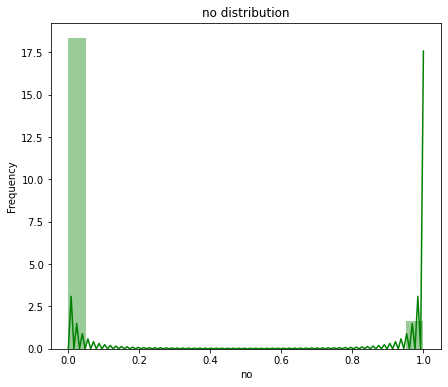

In [17]:
# no distribution
f, ax = plt.subplots(figsize=(7, 6))
sns.distplot(data['no'], bins = 20, color = 'green')
ax.set(ylabel="Frequency")
ax.set(xlabel="no")
ax.set(title="no distribution")

The variable only has 2 values: 0 and 1.
(Discrete Probability distribution)

[Text(0.5, 1.0, 'platform_os distribution')]

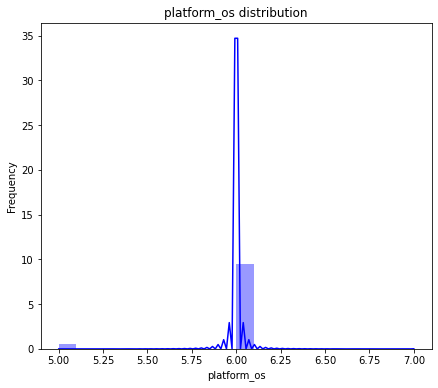

In [18]:
# platform_os distribution
f, ax = plt.subplots(figsize=(7, 6))
sns.distplot(data['platform_os'], bins = 20, color = 'blue')
ax.set(ylabel="Frequency")
ax.set(xlabel="platform_os")
ax.set(title="platform_os distribution")

6 is the mode of the distribution. (Discrete Probability distribution)

##### 4.2.2 Count plots

They indicate unique value counts in a variable.

Text(0.5, 1.0, 'a countplot indicating unique value counts of the yes column')

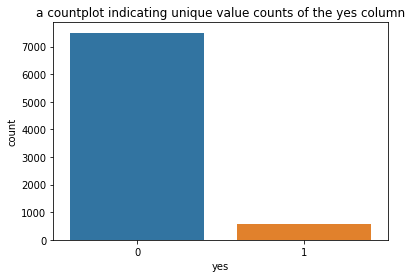

In [19]:
# yes
sns.countplot(data['yes'])
plt.title('a countplot indicating unique value counts of the yes column')

The 0 col has a higher count cause it represents users who either answered no or didn't respond to the questionnaire.

Text(0.5, 1.0, 'a countplot indicating unique value counts of the no column')

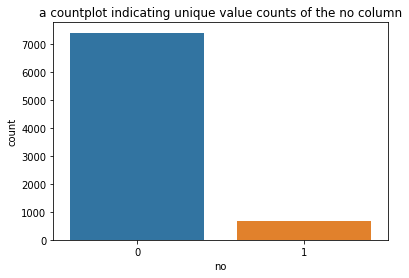

In [20]:
# no
sns.countplot(data['no'])
plt.title('a countplot indicating unique value counts of the no column')

Like in the yes col, the 0 response has a higher count cause it represents users who either answered yes or didn't respond to the questionnaire.


Text(0.5, 1.0, 'a countplot indicating unique value counts of the experiment column')

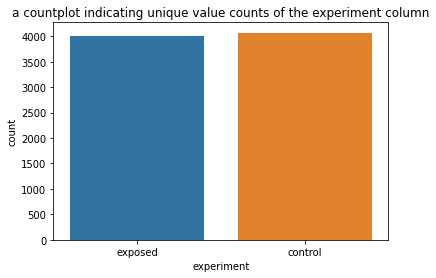

In [21]:
# experiment
sns.countplot(data['experiment'])
plt.title('a countplot indicating unique value counts of the experiment column')

Number of users in the groups are balanced as it should be.

Text(0.5, 1.0, 'a countplot indicating unique value counts of the platform_os column')

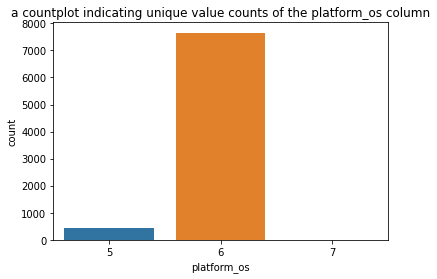

In [22]:
# platform_os
sns.countplot(data['platform_os'])
plt.title('a countplot indicating unique value counts of the platform_os column')

Whatever 6 os is representative of, its the most common os used. Probably android, or ios or windows. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

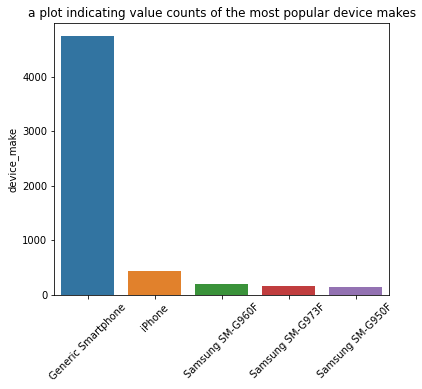

In [23]:
# device_make (top 10 most popular)
a = data.device_make.value_counts(ascending=False).head(5)
a = pd.DataFrame(a)
plt.figure(figsize = (6,5))
sns.barplot(x = a.index, y = a.device_make)
plt.title('a plot indicating value counts of the most popular device makes')
plt.xticks(rotation = 45)

Who's this generic guy.  ?? 

Samsung taking 60% of the top 5, impressive.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

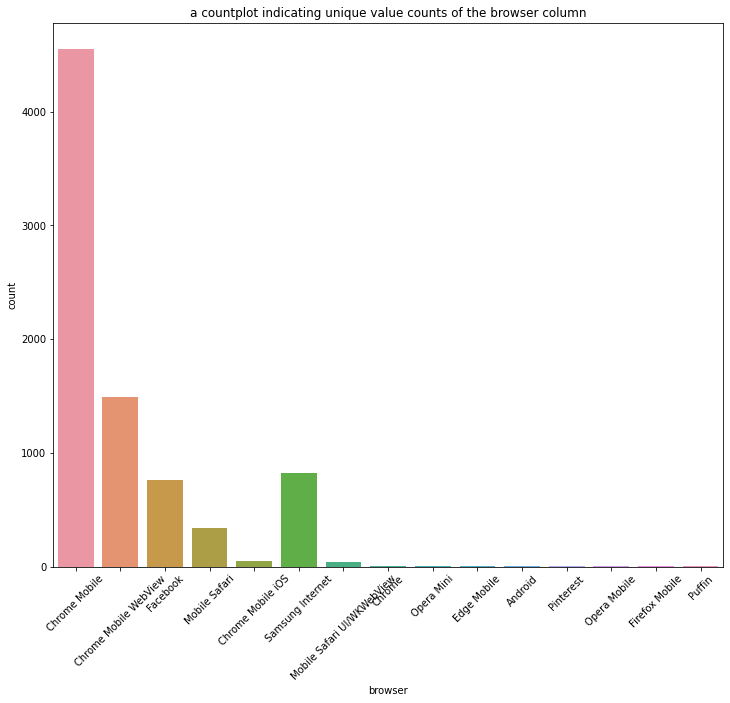

In [24]:
# browser
plt.figure(figsize = (12,10))
sns.countplot(data['browser'])
plt.title('a countplot indicating unique value counts of the browser column')
plt.xticks(rotation = 45)

Chrome(mobile, web and ios) and Facebook are the most popular browsers used.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

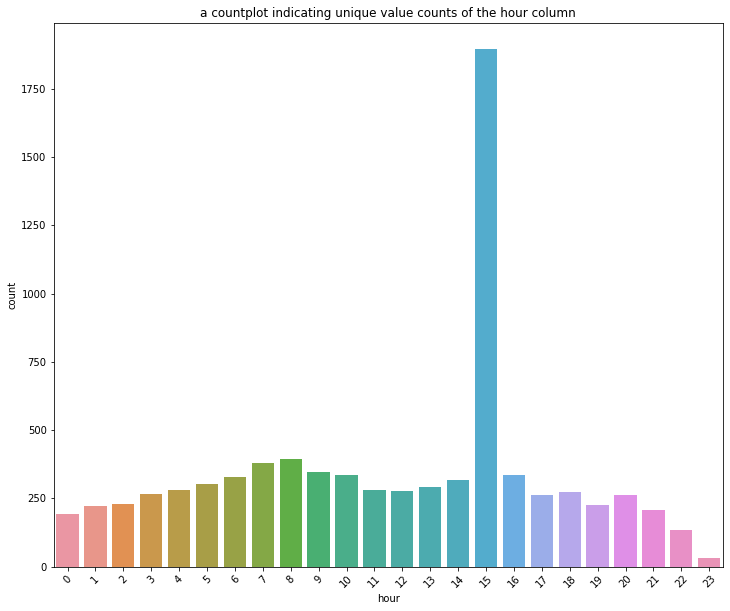

In [25]:
# hour
plt.figure(figsize = (12,10))
sns.countplot(data['hour'])
plt.title('a countplot indicating unique value counts of the hour column')
plt.xticks(rotation = 45)

The 15th hour has the highest number of users. 

## 5. Multivariate analysis

Involves observation and analysis of more than one statistical outcome variable at a time.

### 5.1 Correlation


Text(0.5, 1.0, 'a heatmap indicating correlation between the variables')

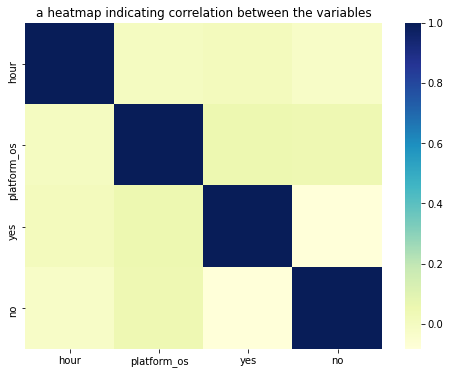

In [26]:
corr = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap="YlGnBu")
plt.title('a heatmap indicating correlation between the variables')

Most of these features are categorical, so we don't expect any correlation whatsoever.

### 5.2 Pair Plots (Bivariate Analysis)

Text(0.5, 1.0, 'Scatter plot showing relationship between yes and no')

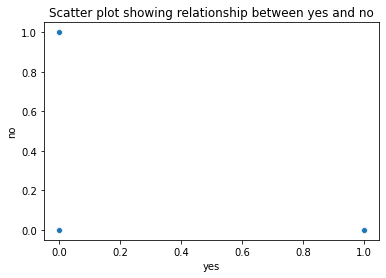

In [27]:
# yes vs no
plt.figure(figsize=(6, 4))
sns.scatterplot(data = data, x='yes', y='no')
plt.title('Scatter plot showing relationship between yes and no')

In [28]:
# encode the categorical features in order to be able to plot them
df = data.copy()   # make a copy to void tempering with the original one
columns = [1, 3, 4]
for col in columns:
    x = df.iloc[:, col].values
    x = x.reshape(-1,1)
    encoder = LabelEncoder()
    encoder = encoder.fit(x)
    x = encoder.transform(x)
    df.iloc[:, col] = x 

Text(0.5, 1.0, 'Scatter plot showing relationship between device_make and browser')

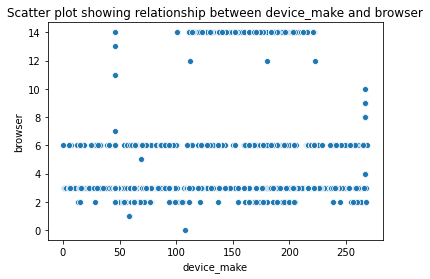

In [29]:
# device vs browser
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df, x='device_make', y='browser')
plt.title('Scatter plot showing relationship between device_make and browser')

No linear relationship.


Text(0.5, 1.0, 'Scatter plot showing relationship between device_make and os')

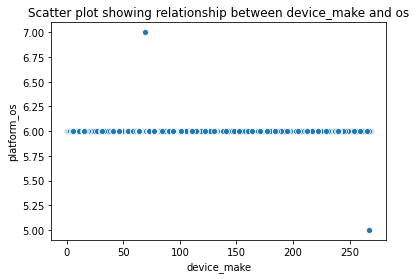

In [30]:
# device  vs os
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df, x='device_make', y='platform_os')
plt.title('Scatter plot showing relationship between device_make and os')

The common platform os is '6'.

No linear relationship.


Text(0.5, 1.0, 'Scatter plot showing relationship between browser and os')

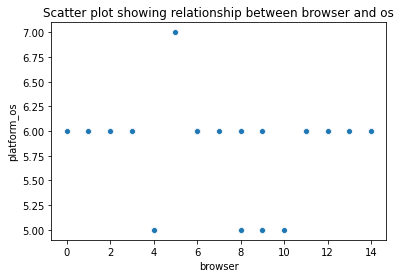

In [31]:
# os vs browser
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df, x='browser', y='platform_os')
plt.title('Scatter plot showing relationship between browser and os')

The common platform os is '6'. 

No linear relationship.

Text(0.5, 1.0, 'Scatter plot showing relationship between hour and yes')

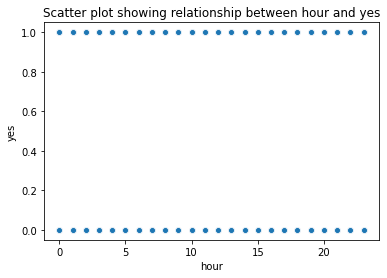

In [32]:
# hour vs yes
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df, x='hour', y='yes')
plt.title('Scatter plot showing relationship between hour and yes')

The yes column has only 0s and 1s.

No linear relationship.

Text(0.5, 1.0, 'Scatter plot showing relationship between hour and no')

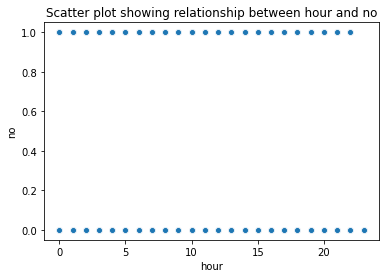

In [33]:
# hour vs no
plt.figure(figsize=(6, 4))
sns.scatterplot(data = df, x='hour', y='no')
plt.title('Scatter plot showing relationship between hour and no')

Again: the no only has 0 and 1 values.

No linear relationship.

In [34]:
# generate the requirements file
!pip freeze > requirements.txt